# Project3

In [ ]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

- **Dataset(s) to be used:** https://www2.census.gov/programs-surveys/cps/tables/time-series/historical-poverty-people/hstpov19.xlsx
- **Analysis question:** How have poverty rates in the United States changed under different presidential administrations, and is there a significant correlation between political party policies and the reduction of poverty rates?
- **Columns that will (likely) be used:**
  - [State]
  - [Total population]
  - [Number in poverty]
  - [Percent in poverty]
  - [Year]
- **Hypothesis**: Poverty rates in the United States are reduced more effectively during Democratic administrations compared to Republican administrations due to the Democratic Party's historically greater focus on welfare state policies and social safety nets.
- **Site URL:** [git push origin main](https://finalprojectsofia.readthedocs.io/en/latest/project_3.html)

The dataset is read from a CSV file into a DataFrame called poverty. Unnecessary columns like margin of error are dropped, and the first row, likely containing metadata, is removed.

In [18]:
import pandas as pd
import plotly.express as px
poverty = pd.read_csv("dataset.csv")
poverty.drop(columns=['Margin of error (±)', 'Margin of error (±).1'], inplace=True)
poverty.drop(index=[0], inplace=True)
poverty

,State,Total population,Number in poverty,Percent in poverty,Year
1,Alabama,4995.0,711.0,14.2,2023
2,Alaska,717.0,72.0,10.1,2023
3,Arizona,7210.0,861.0,11.9,2023
4,Arkansas,3011.0,416.0,13.8,2023
5,California,38550.0,4568.0,11.9,2023
...,...,...,...,...,...
1423,Vermont,520.0,62.0,12.0,1980
1424,Virginia,5204.0,647.0,12.4,1980
1425,Washington,4223.0,538.0,12.7,1980
1426,West Virginia,1952.0,297.0,15.2,1980


The dataset is grouped by the "Year" column to calculate aggregate statistics. The total number of people in poverty and the total population for each year are summed.
The poverty rate for each year is computed as the percentage of the total population in poverty. This is stored in a new DataFrame poverty_rate_per_year, which contains the poverty rate for each year.


In [24]:
# Group data by year
grouped_data = poverty.groupby("Year")

# Calculate total number in poverty and total population for each year
total_poverty = grouped_data["Number in poverty"].sum()
total_population = grouped_data["Total population"].sum()

# Calculate the poverty rate for each year
poverty_rate_per_year = (total_poverty / total_population * 100).reset_index()
poverty_rate_per_year.columns = ["Year", "Total_Poverty_Rate"]

# Display the result
print(poverty_rate_per_year)

    Year  Total_Poverty_Rate
0   1980           13.013430
1   1982           15.001179
2   1983           15.242165
3   1986           13.567225
4   1989           12.820273
5   1990           13.510399
6   1996           13.724251
7   1997           13.249424
8   1998           12.722119
9   2001           11.696899
10  2002           12.120521
11  2003           12.468274
12  2005           12.608666
13  2006           12.302915
14  2007           12.481974
15  2008           13.235681
16  2009           14.350670
17  2011           15.000650
18  2012           14.976747
19  2014           14.783069
20  2015           13.548296
21  2016           12.699790
22  2017           12.308414
23  2018           11.781937
24  2019           10.468337
25  2021           11.561283
26  2022           11.496314
27  2023           11.089108


A dictionary is created to map years to the political party of the president in office (Democratic or Republican). This mapping is added as a new column, President_Party, in the poverty_rate_per_year DataFrame.

In [28]:
# Define a dictionary mapping years to the president's political party
presidents = {
    "Democratic": list(range(1993, 2001)) + list(range(2009, 2017)) + list(range(2021, 2024)),
    "Republican": list(range(1980, 1993)) + list(range(2001, 2009)) + list(range(2017, 2021)),
}

# Create a mapping for each year
year_to_party = {}
for party, years in presidents.items():
    for year in years:
        year_to_party[year] = party

# Map the "Year" column to the political party
poverty_rate_per_year["President_Party"] = poverty_rate_per_year["Year"].map(year_to_party)

poverty_rate_per_year


,Year,Total_Poverty_Rate,President_Party
0,1980,13.013430,Republican
1,1982,15.001179,Republican
2,1983,15.242165,Republican
3,1986,13.567225,Republican
4,1989,12.820273,Republican
5,1990,13.510399,Republican
6,1996,13.724251,Democratic
7,1997,13.249424,Democratic
8,1998,12.722119,Democratic
9,2001,11.696899,Republican


A line chart is generated using Plotly to visualize the poverty rate across years. Color bands are added to indicate the tenure of Democratic and Republican presidents, making it easier to compare trends with political leadership.

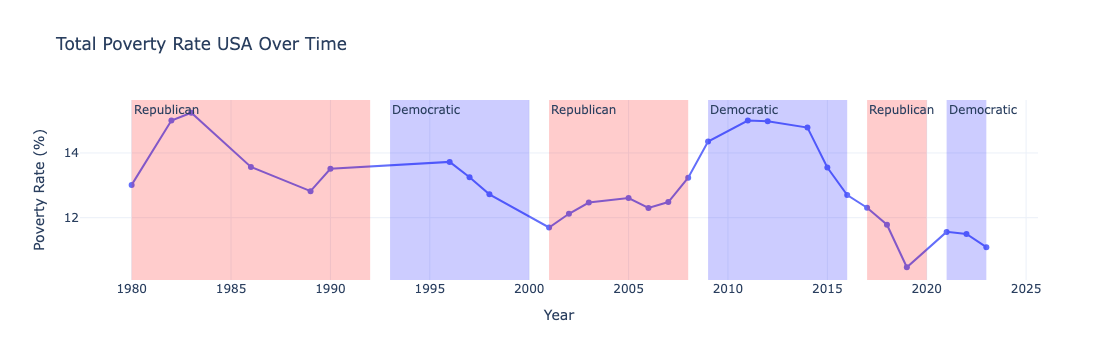

In [36]:
#graph showing evolution of poverty rates

fig = px.line(
    poverty_rate_per_year,
    x='Year',
    y='Total_Poverty_Rate',
    title='Total Poverty Rate USA Over Time',
    labels={'Rate': 'Rate', 'Year': 'Year'},
    markers=True  
)

for party, years in {
    "Democratic": [(1993, 2000), (2009, 2016), (2021, 2023)],
    "Republican": [(1980, 1992), (2001, 2008), (2017, 2020)],
}.items():
    for start, end in years:
        fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor="blue" if party == "Democratic" else "red",
            opacity=0.2,
            line_width=0,
            annotation_text=party,
            annotation_position="top left",
        )

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Poverty Rate (%)",
    legend_title="Presidential Party",
    template="plotly_white",
)

fig.show()

The poverty_rate_per_year DataFrame is grouped by President_Party to compute average poverty rates, starting and ending rates, and the overall change during each party's tenure. This analysis provides numerical insights into how poverty evolved under each party's administration.

In [42]:
party_stats = poverty_rate_per_year.groupby("President_Party").agg(
    Avg_Poverty_Rate=("Total_Poverty_Rate", "mean"),
    Start_Poverty_Rate=("Total_Poverty_Rate", "first"),
    End_Poverty_Rate=("Total_Poverty_Rate", "last"),
)

# Calculate the change in poverty rate during each party's period
party_stats["Change_in_Poverty_Rate"] = party_stats["End_Poverty_Rate"] - party_stats["Start_Poverty_Rate"]

# Display the summary
party_stats

,Avg_Poverty_Rate,Start_Poverty_Rate,End_Poverty_Rate,Change_in_Poverty_Rate
President_Party,,,,
Democratic,13.266810,13.724251,11.089108,-2.635142
Republican,12.789268,13.013430,10.468337,-2.545093


Initially, my project aimed to explore whether there is a significant difference in poverty reduction between Democratic and Republican administrations in the United States. I hypothesized that Democratic governments might have a greater impact on poverty reduction due to their historically stronger focus on welfare policies.
I began by visualizing the poverty rates over time using a line graph, complemented by annotations indicating the political party in office. While this provided a clear representation of poverty trends, it became evident that visual inspection alone was insufficient to answer my research question. Although some patterns could be inferred, such as reductions in poverty during certain administrations, the visualization lacked the precision needed to draw definitive conclusions.
Recognizing the limitations of the visualization, I pursued a more quantitative approach. Specifically, I calculated the average poverty rates during Democratic and Republican administrations and examined the actual changes in poverty rates from the beginning to the end of each party's tenure. This analysis allowed me to quantify the impact of each administration.

The results showed:

Democratic administrations: An average poverty rate of 13.27%, with a total reduction of -2.64% over their terms.
Republican administrations: An average poverty rate of 12.79%, with a total reduction of -2.55% over their terms.
The difference between the two parties in terms of poverty reduction is minimal, with Democrats achieving a slightly higher reduction (-2.64% vs. -2.55%). However, the gap is so small that it is unlikely to be meaningful in isolation.

This project highlights the importance of combining visual and numerical analysis to draw more informed conclusions. It also underscores the complexity of socioeconomic phenomena like poverty, which resist simplistic explanations or attributions to single variables like political party. Future studies could explore additional factors, such as economic growth rates, unemployment trends, or specific welfare policies, to better understand the drivers behind poverty trends.